# Group Assignment 2: Census Data Exploration
### Median Household Income
Carolyn Chu

This week's assignment is focused on manipulating and visualizing data relevant to our group project on Los Angeles parks. I will explore the variable "Median Household Income in the Past 12 Months (in 2019 Inflation-adjusted Dollars)" from American Community Survey 5-year estimates (2015-2019). Data were pulled from censusreporter.org.

In [1]:
# import pandas, geopandas, contextily and matplotlib
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import median household income geojson data from censusreporter
# variable used throughout this notebook is 'hhinc'
hhinc = gpd.read_file('data/acs2019_5yr_B19013_14000US06037222001.geojson')

## Preliminary exploration and renaming of columns

In [3]:
# how many entries and columns?
hhinc.shape

(1005, 5)

In [4]:
# what do the first five entries look like?
hhinc.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [5]:
# understand the data types
hhinc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B19013001         993 non-null    float64 
 3   B19013001, Error  990 non-null    float64 
 4   geometry          1005 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 39.4+ KB


In [6]:
# list the column variables as to rename them with more legible names
list(hhinc)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [7]:
# rename the third and fourth column to Median Household Income and Margin of Error
# refer to metadata for any clarification needed
hhinc.columns = ['geoid', 'name', 'Median Household Income', 'Margin of Error', 'geometry']

In [8]:
# check the first five rows again
hhinc.head()

,geoid,name,Median Household Income,Margin of Error,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Explore and visualize the data
In the section above, I learned that there are about 1,000 census tracts in the City of LA. This data file is relatively simple, showing only one major variable: median household income. 

In this next section, I hope to explore the data visually through charts and maps. First, I will learn some basic descriptive statistics of the data, such as the mean, median, and range. Then I hope to construct some of the first maps to describe the data.

In [9]:
# get some basic statistics on median household income
hhinc['Median Household Income'].describe()

count       993.000000
mean      68197.410876
std       36624.331957
min        9191.000000
25%       42766.000000
50%       58576.000000
75%       85262.000000
max      250001.000000
Name: Median Household Income, dtype: float64

### A histogram of median household income

<AxesSubplot:ylabel='Frequency'>

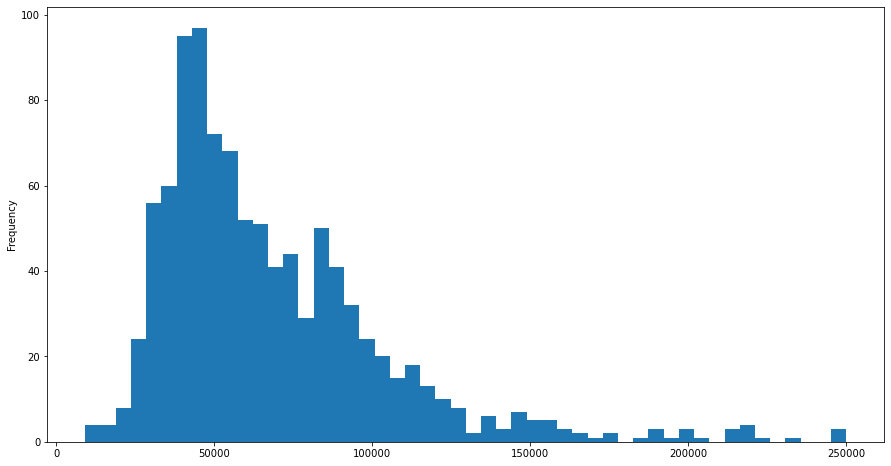

In [10]:
# create a histogram of median household incomes
hhinc['Median Household Income'].plot.hist(figsize=(15,8),bins=50)

### Filtering and plotting the 10 census tracts with the highest median income

In [11]:
# sort to find the census tracts with the highest median incomes
hhinc_sorted = hhinc.sort_values(by='Median Household Income',ascending = False)
hhinc_sorted[['geoid','Median Household Income']].head(10)

,geoid,Median Household Income
831,14000US06037262303,250001.0
832,14000US06037262400,250001.0
340,14000US06037141700,250001.0
994,14000US06037980019,231250.0
833,14000US06037262501,224962.0
839,14000US06037264000,220417.0
338,14000US06037141500,219698.0
827,14000US06037262100,217462.0
838,14000US06037262802,217292.0
829,14000US06037262301,215750.0


In [ ]:
# create a graphic to show these census tracts
hhinc_sorted.head(10).plot(figsize=(8,8),
                           color="green",
                           edgecolor='black',
                           linewidth=0.5)

Having some basic understanding of Los Angeles, I can tell these tracts are in West LA around Topanga, Pacific Palisades, Westwood, and Bel-Air.

### Make a map that has a basemap
Adding basemaps would help orient viewers to Los Angeles data. Below, I am mapping by quartiles to see the census tracts that are in the below the 25th percentile and above the 75th percentile. We can see from the maps below that tracts in the San Fernando Valley and South LA have some of the lowest household incomes. In contrast, some of the tracts with the highest household incomes in the city are located around Westwood, Marina Del Rey, and Eagle Rock.

In [ ]:
# include a basemap - but first, reproject the geodataframe to Web Mercator (epsg: 3857)
hhinc_web_mercator = hhinc.to_crs(epsg=3857)

In [ ]:
# use subplots to create multiple layered maps
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
# pulled the 42766 figure from my statistics code above - it's the 25th percentile cut off
hhinc_web_mercator[hhinc_web_mercator['Median Household Income'] < 42766.000000].plot(
                                                               ax=ax, 
                                                               color="cyan",
                                                               alpha=0.4,
                                                               edgecolor='black', 
                                                               linewidth=0.5,
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with Median Household Incomes Below the 25th Percentile',fontsize=18,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)


In [ ]:
# use subplots to create multiple layered maps
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
# pulled the 85262 figure from my statistics code above - it's the 75th percentile cut off
hhinc_web_mercator[hhinc_web_mercator['Median Household Income'] > 85262.000000].plot(
                                                               ax=ax, 
                                                               color="magenta",
                                                               alpha=0.2,
                                                               edgecolor='black', 
                                                               linewidth=0.5,
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with Median Household Incomes Above the 75th Percentile',fontsize=18,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
